# Task 4.4 b)

Value of M    :  24
Value of delta:  0.05477410555448553


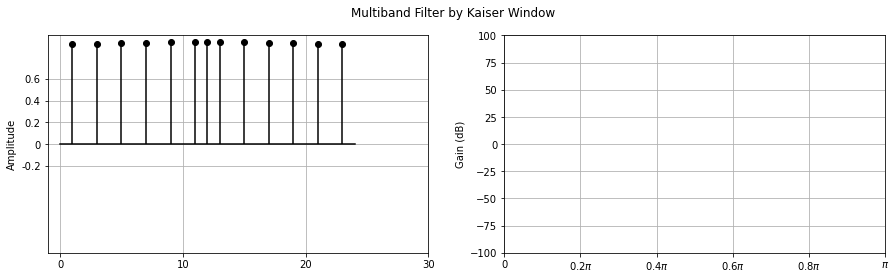

In [96]:
import numpy as np
from scipy import signal
from scipy import special as sps
import matplotlib.pyplot  as plt

np.seterr(divide='ignore', invalid='ignore');

M = 24
dw = .1*np.pi
delta = 10**((M*2.285*dw + 8)/-20) # gives the correct delta based on the value of M
w1 = np.pi/5
w2 = 2*np.pi/5
w3 = 3*np.pi/5
w4 = np.pi
w1c = (2*w1-dw)/2
w2c = (2*w2-dw)/2
w3c = (2*w3+dw)/2
w4c = (2*w4-dw)/2
G1 = .01 # 40 dB
G2 = 0.1 # 20 dB
G3 = -np.inf
G4 = 1 # 0 dB
n = np.arange(M+1)
A = -20*np.log10(delta);
x = n-M/2

# The filter:
hi_bp = ((G1-G2)*(np.sin(w1c*x))/(np.pi*x))+((G2-G3)*(np.sin(w2c*x))/(np.pi*x))+((G3-G4)*(np.sin(w3c*x))/(np.pi*x))+(G4*(np.sin(w4c*x))/(np.pi*x))
# Found the limit using MatLab function limit()
hi_bp[np.isnan(hi_bp)] = ((G1-G2)*w1c + w4c)/(np.pi)
#hi_bp[np.isnan(hi_bp)] = w1c/np.pi
#hi_bp[np.isnan(hi_bp)] = w2c/np.pi
#hi_bp[np.isnan(hi_bp)] = w3c/np.pi
#hi_bp[np.isnan(hi_bp)] = w4c/np.pi
hi = hi_bp

# Building the Kaiser Window:
# Input parameters for the Kaiser window:
if A > 50:
    beta = .1102*(A - 8.7)
elif A < 21:
    beta = 0.
else:
    beta = .5842*(A - 21)**(.4) + .07886*(A - 21)

# Calling the modified Bessel functions of the first kind:
Win = np.abs(np.real(sps.iv(0, beta*(1 - ((n - M/2)/M/2)**2)**(1/2))/sps.iv(0,beta)))

h = hi*Win
w, H = signal.freqz(h,1,worN=512)

print('Value of M    : ',M)
print('Value of delta: ',delta)

fig1, axs = plt.subplots(1,2, sharex= False,figsize=(15,4))
fig1.suptitle('Multiband Filter by Kaiser Window')

markerline, stemlines, baseline  = axs[0].stem(h, markerfmt='ko')
markerline.set_markerfacecolor('k')
stemlines.set_color('k')
baseline.set_color('k')

axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([-1, 1])
axs[0].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_yticklabels([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_xlim([-1, len(h)])
axs[0].set_xticks([0, 10, 20, 30])
axs[0].grid(True)

axs[1].plot(w,20*np.log10(abs(H)),'k')
axs[1].set_ylabel('Gain (dB)')
axs[1].set_ylim([-100, 100])
axs[1].grid(True)
axs[1].set_xlim([0, np.pi])
axs[1].set_xticks([0, 2*np.pi/10, 4*np.pi/10, 6*np.pi/10, 8*np.pi/10, np.pi])
axs[1].set_xticklabels([0, r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$',r'$0.8\pi$', r'$\pi$']);

